                                         
                                         
                                         
                                         
                                         
                                         PREPROCESSING 



                            Data quality, clean filter, normalize.
                             
                             
                             
              
                    Encoding: Convert qualitative datas to numerical values.
    
                    Normalization: Put numerical variables on the same scale.
    
                                     sklearn.preprocessing
                        
                        
                        
    
                    Imputation: Replace missing datas with statistical values.
    
                     
                                         sklearn.impute
                            
                            
                            
    
            Selection: Use statistical test to select the most useful variables for the model.
                    
                                      sklearn.feature_selection
                   
                   
                   
                    
                    Extraction: Creat new variables from hidden informations . 
    
                                      sklearn.feature_extraction
    
  

##                        sklearn.preprocessing



In [63]:
import numpy as np 

from sklearn.preprocessing import LabelEncoder

x=np.array(['cat', 'dog', 'cat', 'bird'])

# Pipeline

- Transformer + Estimator [Fit() :train set. Predict(): test set] = Pipeline 

In [64]:
transformer=LabelEncoder()

# Encode target labels with value between 0 and n_classes-1

transformer.fit_transform(x)

# After it we can transform the train set in the same way and then predict.


array([1, 2, 1, 0], dtype=int64)

# Encoding 


# Label Encoder 
- (Encode target labels with value between 0 and n_classes-1)

### Target Transformer

- Encoding Y (Target) Variable.
- Associate each category or class to a unique decimal value.


In [66]:

y=np.array(['cat', 'dog', 'cat', 'bird'])
encoder=LabelEncoder()
encoder.fit_transform(y)

array([1, 2, 1, 0], dtype=int64)

# Inverse of Label Encoder 
## Target Transformer

- After the model has finished its predictions we need to "Recover" qualitative datas from the numerical ones.

In [67]:
encoder.inverse_transform(np.array([0,0,2,1]))

array(['bird', 'bird', 'dog', 'cat'], dtype='<U4')

# Ordinal Encoder  
## Class Transformer

- Encoding X variables. Multiple Variables and columns.
- Don't use it if there is no numerical order between variables. It will make no sens. 

In [68]:
x=np.array([['cat', 'hairs'], ['dog', 'hairs'], ['cat', 'hairs'], ['bird', 'feathers']])
from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder()
encoder.fit_transform(x)

array([[1., 1.],
       [2., 1.],
       [1., 1.],
       [0., 0.]])

# One Hot Encoder (x) 
## Class Transformer

- OneHot: 
     Each class or category is binary represented in a column of its own. 
     we break down the initial variable into several sub-variales Creating as many colomn as we have category or class.

In [70]:
from sklearn.preprocessing import OneHotEncoder

y=np.array([['cat', 'hairs'], ['dog', 'hairs'], ['cat', 'hairs'], ['bird', 'feathers']],)
encoder.fit_transform(y)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

# - Severals rows becoming columns is NOT a problem.
## Sparse matrice ( Majority of Zero values)
- Value , row , cols ==> CSR  Compressed Sparse Row Format.
- We keep only the position of the NON-ZERO Values.
- COO FORMAT
values=[a,b,c]
rows=[0,1,2]
cols=[0,2,4]

- Encoder = LabelBinarizer(sparse_output=True)

# LabelBinarizer 
## Target Transformer

In [8]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np
y=np.array(['chat','chien','chat','oiseau'])
encoder = LabelBinarizer()
encoder.fit_transform(y)


array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [7]:
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(x)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

# Normalisation


- Normalizes the quantitative variables.

- Why?

    - Example: for gradient descent, if one variable takes more weight than another, it is very difficult for the cost function to converge to its minimum.

- Normalisation doesn't change anything,same distance between the variables are keeped.

# MinMaxScaler

## Transform features by scaling each feature to a given range.

#### This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

- MinMaxScaler


- Xscaled=X-Xmin//Xmax-Xmin

- 70 ==> 0
- 80==> 0,2
- 120==> 1

In [13]:
from sklearn.preprocessing import MinMaxScaler
l=np.array([[70],[80],[120]])
scaler=MinMaxScaler()
scaler.fit_transform(l)


array([[0. ],
       [0.2],
       [1. ]])

- Example with Iris Data Set 

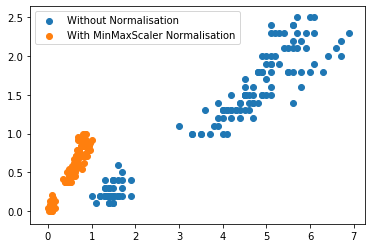

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris=load_iris()
x=iris.data
x_minmax= MinMaxScaler().fit_transform(x)

plt.scatter(x[:,2],x[:,3],label='Without Normalisation')
plt.scatter(x_minmax[:,2],x_minmax[:,3],label='With MinMaxScaler Normalisation')
plt.legend()

# Standardisation

- Transform the data so that the variables are normalized to get an average of 0 and a standard deviation of 1.
    - Step 1 : Subtract the average, μ, from the value you want to convert, X.
    - step 2 : Divide the result of step 1 by the standard deviation, σ.

        - Xscaled=X-MyuX//sigmaX


- 70 ==> -0,92
- 80==> -0,46
- 120==> 1,38

- 1,38-0,46-0,92=0
- std=1

In [71]:
from sklearn.preprocessing import StandardScaler

r=np.array([[70],[80],[120]])

scaler=StandardScaler()
scaler.fit_transform(r)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

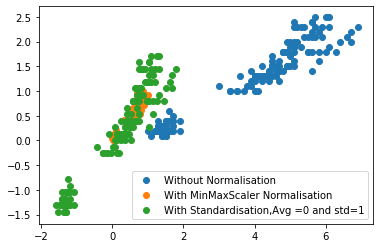

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris=load_iris()
x=iris.data
x_minmax= MinMaxScaler().fit_transform(x)
x_std=StandardScaler().fit_transform(x)

plt.scatter(x[:,2],x[:,3],label='Without Normalisation')
plt.scatter(x_minmax[:,2],x_minmax[:,3],label='With MinMaxScaler Normalisation')
plt.scatter(x_std[:,2],x_std[:,3],label='With Standardisation,Avg =0 and std=1')
plt.legend()

 -Don't use when there is outliers .  
- Outliers are too fare from our Data set representation.

# RobustScaller
## Good for Outliers.

- Scale features using statistics that are robust to outliers.

- This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). 
- The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. 
- Median and interquartile range are then stored to be used on later data using the transform method.

- Standardization of a dataset is a common requirement for many machine learning estimators. 
- Typically this is done by removing the mean and scaling to unit variance.
- However, outliers can often influence the sample mean / variance in a negative way. 
- In such cases, the median and the interquartile range often give better results.


In [74]:
from sklearn.preprocessing import RobustScaler

r=np.array([[70],[80],[120]])

scaler=RobustScaler()
scaler.fit_transform(r)

array([[-0.4],
       [ 0. ],
       [ 1.6]])

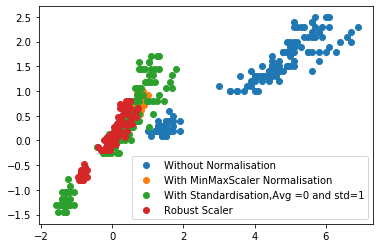

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris=load_iris()
x=iris.data
x_minmax= MinMaxScaler().fit_transform(x)
x_std=StandardScaler().fit_transform(x)
x_robust=RobustScaler().fit_transform(x)
plt.scatter(x[:,2],x[:,3],label='Without Normalisation')
plt.scatter(x_minmax[:,2],x_minmax[:,3],label='With MinMaxScaler Normalisation')
plt.scatter(x_std[:,2],x_std[:,3],label='With Standardisation,Avg =0 and std=1')
plt.scatter(x_robust[:,2],x_robust[:,3],label='Robust Scaler')
plt.legend()

# Feature Ingeneering with PolynomialFeatures



- Create polynomial variables from our existing variables.
    - Develop a better model.
- Feature engineering is the process of using domain knowledge to extract functionality from raw data using data mining techniques. 
- These features can be used to improve the performance of machine learning algorithms. Feature engineering can be thought of as applied machine learning itself.

### Always normalize your data after using polynomial characteristics

In [76]:
from sklearn.preprocessing import PolynomialFeatures
x=np.array([[1],[2],[0.5]])
PolynomialFeatures(2).fit_transform(x)


array([[1.  , 1.  , 1.  ],
       [1.  , 2.  , 4.  ],
       [1.  , 0.5 , 0.25]])

- From x = > 1 -  x  -  x^2 
- From degree 1 to degree 2
- ax^2+bx+c

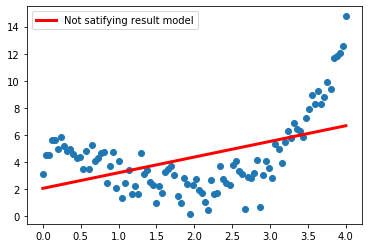

In [77]:
from sklearn.linear_model import LinearRegression

x=np.linspace(0,4,100).reshape((100,1))
y=x**2+5*np.cos(x)+np.random.randn(100,1)

plt.scatter(x,y)
model =LinearRegression().fit(x,y)
y_pred=model.predict(x)

plt.plot(x,y_pred,c='r',lw=3 ,label='Not satifying result model')
plt.legend()

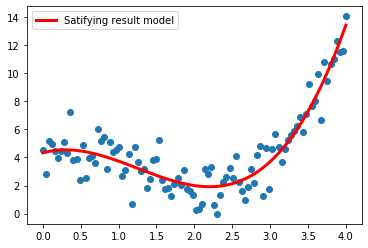

In [78]:
from sklearn.linear_model import LinearRegression

x=np.linspace(0,4,100).reshape((100,1))
y=x**2+5*np.cos(x)+np.random.randn(100,1)

plt.scatter(x,y)
x_poly=PolynomialFeatures(3).fit_transform(x)

model = LinearRegression().fit(x_poly,y)
y_pred=model.predict(x_poly)

plt.plot(x,y_pred,c='r',lw=3 ,label='Satifying result model')
plt.legend()


# Nonlinear transformation


## Power transformation

#### Grant the data a normal or Gaussian distribution.

- Create a normal distribution from our existing variables.
- Develop a better training model.

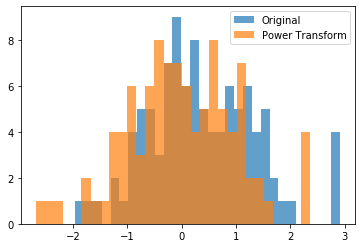

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
np.random.seed(0)
x=np.random.rand(100,2)+np.random.randn(100,2)
x2=PowerTransformer().fit_transform(x)

plt.hist(x[:,0],bins=30,alpha=0.7,label='Original')
plt.hist(x2[:,0],bins=30,alpha=0.7,label='Power Transform')
plt.legend()
plt.show()

# Examples without Pipeline


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
x=iris.data
y=iris.target

x_train,x_test,y_train,y_test = train_test_split(x,y)

In [107]:
# Transformer
scaler=StandardScaler()
x_train_transformed=scaler.fit_transform(x_train)

# Estimator
model=SGDClassifier(random_state=0)
model.fit(x_train_transformed,y_train)

#Test
X_test_transformed=scaler.transform(x_test)
model.predict(x_train_transformed)

array([0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 1,
       2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 0, 2, 2,
       2, 1])

# Examples with Pipeline


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

x=iris.data
y=iris.target

x_train,x_test,y_train,y_test = train_test_split(x,y)

In [124]:
from sklearn.pipeline import make_pipeline

In [125]:
model=make_pipeline(StandardScaler(),SGDClassifier())
model.fit(x_train,y_train)
model.predict(x_test)

array([1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0])

In [126]:
model

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

# Examples with Pipeline + GridSearchCV


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

x=iris.data
y=iris.target

x_train,x_test,y_train,y_test = train_test_split(x,y)

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
model=make_pipeline(PolynomialFeatures(),StandardScaler(),SGDClassifier(random_state=0))
model

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=0,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)


#### We create a dictionary of parameters for GridSearchCV.

In [158]:
params={
    'polynomialfeatures__degree':[2,3,4],
    'sgdclassifier__penalty':['l1','l2']
}

In [159]:
grid=GridSearchCV(model,param_grid=params,cv=4)

grid.fit(x_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('sgdclassifier',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                     

In [160]:
# Better Parameters?
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'}

In [161]:
grid.score(x_test,y_test)

0.9736842105263158

# Examples without Pre-processing and GridSearchCV 

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

x=iris.data
y=iris.target

x_train,x_test,y_train,y_test = train_test_split(x,y)

model=SGDClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8157894736842105

# Pre Processing and GridSearchCV is Really important in Data Science
# There is in our result a difference of almost 16% 